In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
from tqdm import tqdm

from potential import Potential
from langevem import LEM
from aldi import ALDI

sns.set_context("paper")
sns.set_style("ticks")

In [84]:
D = 2
N = 11
G = lambda u: np.array([u[0]**2*x + u[1] for x in np.linspace(-10, 10, N)])  # R^2 -> R^10
G_prime = lambda u:np.array([[2.*u[0]*x, 1] for x in np.linspace(-10, 10, N)])


a = 2
b = 2
true_parameter = (a, b)

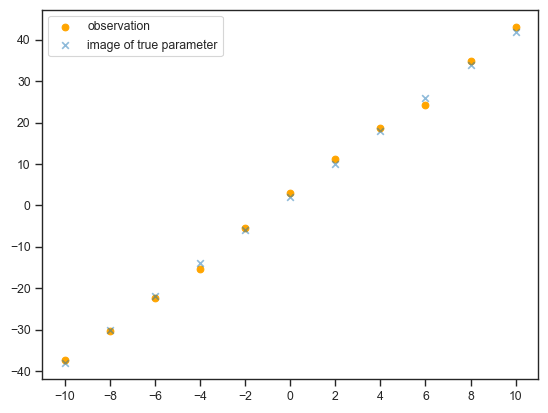

In [87]:
error_sigma = 1.
error_covariance = error_sigma * np.eye(N)
error_mean = np.zeros(N)

measurement_error = np.random.multivariate_normal(error_mean, error_covariance)
observations = np.array([G(true_parameter) + measurement_error])

plt.scatter(x=np.linspace(-10, 10, N), y=observations, color="orange", label="observation", zorder=1)
plt.scatter(np.linspace(-10, 10, N), G(true_parameter), label="image of true parameter", marker="x", alpha=.5)
plt.xticks([-10+2*i for i in range(N)])
plt.legend()

In [88]:
prior_mean = np.array([a+2, b])
prior_variance = 2.

### Experiment 1.a: gradient-based LEM

In [89]:
initial_noise_estimate = 5.# * np.eye(N)
number_of_samples = 50
number_of_runs = 5
number_of_iterations = 30
noise_estimates_gb = np.zeros((number_of_runs, number_of_iterations))

for run in tqdm(range(number_of_runs)):
    lem = LEM(observations=observations,
            samples_per_observation=number_of_samples,
            forward_map=G,
            forward_gradient=G_prime,
            prior_mean=prior_mean,
            prior_covariance=prior_variance,
            number_of_iterations=number_of_iterations,
            initial_noise_estimate=initial_noise_estimate,
            dimensions=(D, N),
            sampler_steps=100,
            gradient_free=False,
            verbose=True)
    lem.max_step_size = 0.01

    #lem.single_problem = True
    lem.number_of_observations = 1

    lem.generate_initial_ensembles()
    initial_ensembles = lem.ensembles.copy()
    ensembles, noise_estimates = lem.EM(verbose=False, return_archive=True)
    print(f"Noise difference: {np.linalg.norm(lem.noise_estimate - error_sigma)}")
    noise_estimates_gb[run, :] = noise_estimates

  0%|          | 0/5 [00:00<?, ?it/s]

Iteration 1...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 622.60it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 2...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 635.54it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 3...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 627.79it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 4...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 596.52it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 5...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 653.41it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 6...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 660.25it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 7...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 621.97it/s]


Updating noise estimate...
Current noise estimate: 3.182854062474003
Iteration 8...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 612.17it/s]


Updating noise estimate...
Current noise estimate: 1.7892647594360171
Iteration 9...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 637.78it/s]


Updating noise estimate...
Current noise estimate: 1.341837395586788
Iteration 10...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 421.84it/s]


Updating noise estimate...
Current noise estimate: 1.156484605189843
Iteration 11...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 639.42it/s]


Updating noise estimate...
Current noise estimate: 1.1056018308636795
Iteration 12...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 647.54it/s]


Updating noise estimate...
Current noise estimate: 1.0797065939391615
Iteration 13...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 629.23it/s]


Updating noise estimate...
Current noise estimate: 1.0767767834707387
Iteration 14...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 625.63it/s]


Updating noise estimate...
Current noise estimate: 1.0767767834707387
Iteration 15...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 650.66it/s]


Updating noise estimate...
Current noise estimate: 1.0923438926099482
Iteration 16...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 636.91it/s]


Updating noise estimate...
Current noise estimate: 1.0910537050118876
Iteration 17...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 640.30it/s]


Updating noise estimate...
Current noise estimate: 1.0910537050118876
Iteration 18...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 638.67it/s]


Updating noise estimate...
Current noise estimate: 1.0910537050118876
Iteration 19...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 649.16it/s]


Updating noise estimate...
Current noise estimate: 1.0668506529539963
Iteration 20...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 645.44it/s]


Updating noise estimate...
Current noise estimate: 1.0668506529539963
Iteration 21...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 642.06it/s]


Updating noise estimate...
Current noise estimate: 1.0757466631390555
Iteration 22...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 642.14it/s]


Updating noise estimate...
Current noise estimate: 1.0707684091565859
Iteration 23...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 635.36it/s]


Updating noise estimate...
Current noise estimate: 1.0707684091565859
Iteration 24...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 450.10it/s]


Updating noise estimate...
Current noise estimate: 1.068482243646352
Iteration 25...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 642.47it/s]


Updating noise estimate...
Current noise estimate: 1.068482243646352
Iteration 26...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 631.30it/s]


Updating noise estimate...
Current noise estimate: 1.0527452083255078
Iteration 27...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 637.47it/s]


Updating noise estimate...
Current noise estimate: 1.0527452083255078
Iteration 28...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 640.32it/s]


Updating noise estimate...
Current noise estimate: 1.0814203138312022
Iteration 29...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 594.19it/s]


Updating noise estimate...
Current noise estimate: 1.0539446925634164
Iteration 30...     
Generating samples...


 20%|██        | 1/5 [00:04<00:19,  4.95s/it]

Updating noise estimate...
Current noise estimate: 1.0539446925634164
Noise difference: 0.053944692563416385
Iteration 1...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 641.77it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 2...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 643.75it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 3...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 648.07it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 4...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 648.12it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 5...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 652.07it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 6...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 637.15it/s]


Updating noise estimate...
Current noise estimate: 3.773900437200758
Iteration 7...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 638.10it/s]


Updating noise estimate...
Current noise estimate: 2.2823146143932167
Iteration 8...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 455.16it/s]


Updating noise estimate...
Current noise estimate: 1.5002455376157355
Iteration 9...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 639.84it/s]


Updating noise estimate...
Current noise estimate: 1.1871120191951214
Iteration 10...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 642.40it/s]


Updating noise estimate...
Current noise estimate: 1.134316077318341
Iteration 11...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 630.23it/s]


Updating noise estimate...
Current noise estimate: 1.0713536829339045
Iteration 12...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 636.11it/s]


Updating noise estimate...
Current noise estimate: 1.0713536829339045
Iteration 13...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 637.12it/s]


Updating noise estimate...
Current noise estimate: 1.0377264165152396
Iteration 14...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 630.86it/s]


Updating noise estimate...
Current noise estimate: 1.0377264165152396
Iteration 15...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 624.99it/s]


Updating noise estimate...
Current noise estimate: 1.0377264165152396
Iteration 16...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 624.55it/s]


Updating noise estimate...
Current noise estimate: 1.0888722754721232
Iteration 17...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 634.79it/s]


Updating noise estimate...
Current noise estimate: 1.0888722754721232
Iteration 18...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 644.28it/s]


Updating noise estimate...
Current noise estimate: 1.0603740275222437
Iteration 19...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 647.55it/s]


Updating noise estimate...
Current noise estimate: 1.0603740275222437
Iteration 20...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 642.83it/s]


Updating noise estimate...
Current noise estimate: 1.0928153791571737
Iteration 21...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 638.63it/s]


Updating noise estimate...
Current noise estimate: 1.0656745183543834
Iteration 22...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 455.93it/s]


Updating noise estimate...
Current noise estimate: 1.0550820498508533
Iteration 23...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 638.49it/s]


Updating noise estimate...
Current noise estimate: 1.0550820498508533
Iteration 24...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 639.68it/s]


Updating noise estimate...
Current noise estimate: 1.0550820498508533
Iteration 25...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 637.60it/s]


Updating noise estimate...
Current noise estimate: 1.0766935648637457
Iteration 26...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 627.73it/s]


Updating noise estimate...
Current noise estimate: 1.0766935648637457
Iteration 27...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 642.58it/s]


Updating noise estimate...
Current noise estimate: 1.0766935648637457
Iteration 28...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 629.61it/s]


Updating noise estimate...
Current noise estimate: 1.0709032081730296
Iteration 29...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 625.80it/s]


Updating noise estimate...
Current noise estimate: 1.0709032081730296
Iteration 30...     
Generating samples...


 40%|████      | 2/5 [00:09<00:14,  4.93s/it]

Updating noise estimate...
Current noise estimate: 1.0764557732220477
Noise difference: 0.07645577322204766
Iteration 1...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 653.05it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 2...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 628.10it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 3...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 649.97it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 4...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 642.04it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 5...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 459.39it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 6...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 600.84it/s]


Updating noise estimate...
Current noise estimate: 4.208912653271286
Iteration 7...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 646.85it/s]


Updating noise estimate...
Current noise estimate: 2.6431643690043103
Iteration 8...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 642.83it/s]


Updating noise estimate...
Current noise estimate: 1.7090320670373744
Iteration 9...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 633.74it/s]


Updating noise estimate...
Current noise estimate: 1.2801896905686918
Iteration 10...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 635.68it/s]


Updating noise estimate...
Current noise estimate: 1.0755429620286112
Iteration 11...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 639.26it/s]


Updating noise estimate...
Current noise estimate: 1.0755429620286112
Iteration 12...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 645.65it/s]


Updating noise estimate...
Current noise estimate: 1.082014224755255
Iteration 13...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 645.15it/s]


Updating noise estimate...
Current noise estimate: 1.082014224755255
Iteration 14...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 645.62it/s]


Updating noise estimate...
Current noise estimate: 1.1026520566233604
Iteration 15...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 646.34it/s]


Updating noise estimate...
Current noise estimate: 1.0225131374382965
Iteration 16...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 636.24it/s]


Updating noise estimate...
Current noise estimate: 1.0225131374382965
Iteration 17...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 642.51it/s]


Updating noise estimate...
Current noise estimate: 1.0225131374382965
Iteration 18...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 642.36it/s]


Updating noise estimate...
Current noise estimate: 1.0225131374382965
Iteration 19...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 461.16it/s]


Updating noise estimate...
Current noise estimate: 1.0716932987412573
Iteration 20...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 644.30it/s]


Updating noise estimate...
Current noise estimate: 1.0716932987412573
Iteration 21...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 644.25it/s]


Updating noise estimate...
Current noise estimate: 1.0469843147829043
Iteration 22...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 637.04it/s]


Updating noise estimate...
Current noise estimate: 1.0469843147829043
Iteration 23...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 650.66it/s]


Updating noise estimate...
Current noise estimate: 1.0469843147829043
Iteration 24...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 637.26it/s]


Updating noise estimate...
Current noise estimate: 1.0993950642515917
Iteration 25...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 636.27it/s]


Updating noise estimate...
Current noise estimate: 1.0993950642515917
Iteration 26...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 653.66it/s]


Updating noise estimate...
Current noise estimate: 1.0954933786254315
Iteration 27...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 640.07it/s]


Updating noise estimate...
Current noise estimate: 1.0954933786254315
Iteration 28...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 644.38it/s]


Updating noise estimate...
Current noise estimate: 1.1112342704380869
Iteration 29...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 634.93it/s]


Updating noise estimate...
Current noise estimate: 1.0949900315776626
Iteration 30...     
Generating samples...


 60%|██████    | 3/5 [00:14<00:09,  4.91s/it]

Updating noise estimate...
Current noise estimate: 1.0536965363001316
Noise difference: 0.0536965363001316
Iteration 1...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 653.31it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 2...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 645.06it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 3...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 466.16it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 4...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 653.81it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 5...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 648.84it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 6...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 645.06it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 7...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 656.19it/s]


Updating noise estimate...
Current noise estimate: 3.4336699659970344
Iteration 8...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 641.46it/s]


Updating noise estimate...
Current noise estimate: 2.353668962375148
Iteration 9...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 650.10it/s]


Updating noise estimate...
Current noise estimate: 1.5124359942939192
Iteration 10...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 638.85it/s]


Updating noise estimate...
Current noise estimate: 1.2657729120564032
Iteration 11...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 635.47it/s]


Updating noise estimate...
Current noise estimate: 1.1309431472963016
Iteration 12...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 642.46it/s]


Updating noise estimate...
Current noise estimate: 1.1309099548869705
Iteration 13...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 577.05it/s]


Updating noise estimate...
Current noise estimate: 1.0819694793555636
Iteration 14...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 646.44it/s]


Updating noise estimate...
Current noise estimate: 1.0819694793555636
Iteration 15...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 652.78it/s]


Updating noise estimate...
Current noise estimate: 1.1021389201362701
Iteration 16...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 648.48it/s]


Updating noise estimate...
Current noise estimate: 1.0422420527126077
Iteration 17...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 456.85it/s]


Updating noise estimate...
Current noise estimate: 1.0422420527126077
Iteration 18...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 637.17it/s]


Updating noise estimate...
Current noise estimate: 1.0684313236550378
Iteration 19...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 638.70it/s]


Updating noise estimate...
Current noise estimate: 1.030682734555879
Iteration 20...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 644.48it/s]


Updating noise estimate...
Current noise estimate: 1.030682734555879
Iteration 21...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 642.24it/s]


Updating noise estimate...
Current noise estimate: 1.030682734555879
Iteration 22...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 651.83it/s]


Updating noise estimate...
Current noise estimate: 1.030682734555879
Iteration 23...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 641.83it/s]


Updating noise estimate...
Current noise estimate: 1.030682734555879
Iteration 24...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 641.47it/s]


Updating noise estimate...
Current noise estimate: 1.0363214295768057
Iteration 25...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 649.14it/s]


Updating noise estimate...
Current noise estimate: 1.0363214295768057
Iteration 26...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 640.87it/s]


Updating noise estimate...
Current noise estimate: 1.0363214295768057
Iteration 27...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 641.53it/s]


Updating noise estimate...
Current noise estimate: 1.0363214295768057
Iteration 28...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 634.69it/s]


Updating noise estimate...
Current noise estimate: 1.0363214295768057
Iteration 29...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 632.53it/s]


Updating noise estimate...
Current noise estimate: 1.0488656624729153
Iteration 30...     
Generating samples...


 80%|████████  | 4/5 [00:19<00:04,  4.92s/it]

Updating noise estimate...
Current noise estimate: 1.0488656624729153
Noise difference: 0.04886566247291535
Iteration 1...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 638.15it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 2...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 651.84it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 3...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 649.54it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 4...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 660.49it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 5...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 649.09it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 6...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 647.01it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 7...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 654.37it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 8...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 646.37it/s]


Updating noise estimate...
Current noise estimate: 2.7902919456659445
Iteration 9...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 640.06it/s]


Updating noise estimate...
Current noise estimate: 1.5572084390975813
Iteration 10...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 639.55it/s]


Updating noise estimate...
Current noise estimate: 1.2248630049763918
Iteration 11...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 641.61it/s]


Updating noise estimate...
Current noise estimate: 1.1228186712674504
Iteration 12...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 643.07it/s]


Updating noise estimate...
Current noise estimate: 1.0679016947822058
Iteration 13...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 633.28it/s]


Updating noise estimate...
Current noise estimate: 1.0679016947822058
Iteration 14...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 454.29it/s]


Updating noise estimate...
Current noise estimate: 1.0679016947822058
Iteration 15...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 642.36it/s]


Updating noise estimate...
Current noise estimate: 1.0703377602602264
Iteration 16...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 647.40it/s]


Updating noise estimate...
Current noise estimate: 1.0277517126740474
Iteration 17...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 639.74it/s]


Updating noise estimate...
Current noise estimate: 1.0277517126740474
Iteration 18...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 580.60it/s]


Updating noise estimate...
Current noise estimate: 1.0598231886135334
Iteration 19...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 324.24it/s]


Updating noise estimate...
Current noise estimate: 1.0598231886135334
Iteration 20...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 641.14it/s]


Updating noise estimate...
Current noise estimate: 1.050884678930731
Iteration 21...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 640.06it/s]


Updating noise estimate...
Current noise estimate: 1.050884678930731
Iteration 22...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 646.33it/s]


Updating noise estimate...
Current noise estimate: 1.0462714392814163
Iteration 23...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 641.54it/s]


Updating noise estimate...
Current noise estimate: 1.0462714392814163
Iteration 24...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 640.73it/s]


Updating noise estimate...
Current noise estimate: 1.0462714392814163
Iteration 25...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 633.22it/s]


Updating noise estimate...
Current noise estimate: 1.0547709812304842
Iteration 26...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 648.25it/s]


Updating noise estimate...
Current noise estimate: 1.0547709812304842
Iteration 27...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 453.43it/s]


Updating noise estimate...
Current noise estimate: 1.0511959142107898
Iteration 28...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 631.74it/s]


Updating noise estimate...
Current noise estimate: 1.0511959142107898
Iteration 29...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 636.01it/s]


Updating noise estimate...
Current noise estimate: 1.0511959142107898
Iteration 30...     
Generating samples...


100%|██████████| 5/5 [00:24<00:00,  4.95s/it]

Updating noise estimate...
Current noise estimate: 1.0947007137319893
Noise difference: 0.0947007137319893


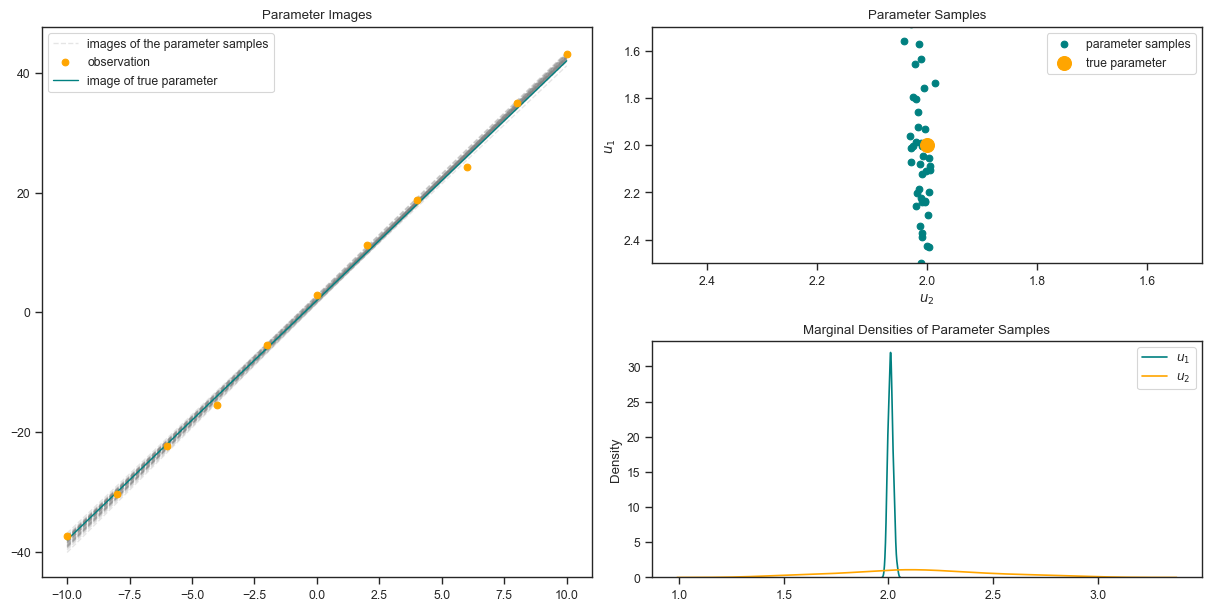

In [90]:
fig, axd = plt.subplot_mosaic([['l', 'rt'],['l', 'rb']], constrained_layout=True, figsize=(12, 6))

axd["rt"].scatter(ensembles[0], ensembles[1], color="teal", label="parameter samples")
axd["rt"].scatter(true_parameter[0], true_parameter[1], color="orange", s=100, label="true parameter", zorder=3)
axd["rt"].set_title("Parameter Samples")
axd["rt"].legend()
axd["rt"].set_ylabel(r"$u_1$")
axd["rt"].set_xlabel(r"$u_2$")
axd["rt"].set_xlim(a+.5, a-.5)
axd["rt"].set_ylim(b+.5, b-.5)

sns.kdeplot(ensembles[0], color="teal", label=r"$u_1$", ax=axd["rb"])
sns.kdeplot(ensembles[1], color="orange", label=r"$u_2$", ax=axd["rb"])
axd["rb"].set_title("Marginal Densities of Parameter Samples")
axd["rb"].legend()
#axd["rb"].set_xticks([-4, -2, 0, 2, 4])

for i, ensemble in enumerate(ensembles.T):
    axd["l"].plot(np.linspace(-10, 10, N), G(ensemble), label="images of the parameter samples" if i == 0 else None, color="grey", alpha=.2, ls="--", lw=1)
axd["l"].scatter(x=np.linspace(-10, 10, N), y=observations, color="orange", label="observation", zorder=3)
axd["l"].plot(np.linspace(-10, 10, N), G(true_parameter), label="image of true parameter", color = "teal", lw=1, zorder=2)
axd["l"].set_title("Parameter Images")
axd["l"].legend()

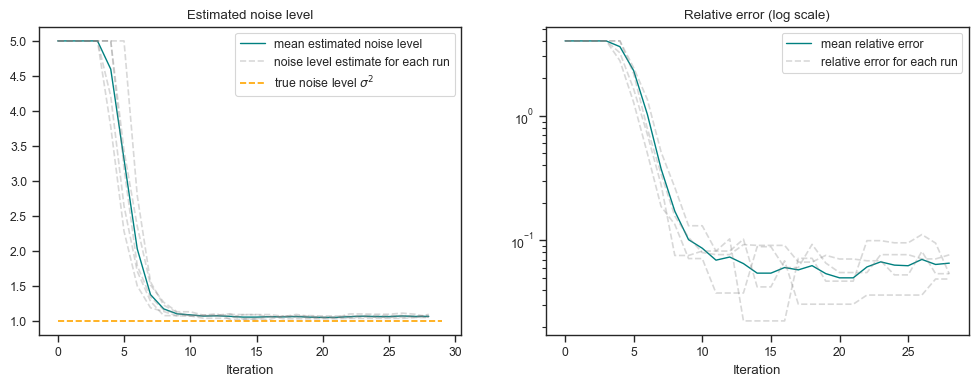

In [91]:
def plot_noise_error(noise_estimates, title=None):
    sns.set_context("paper")

    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(12, 4))
    #noise_estimates = np.array([noise_estimates[i, :] for i in [0,1,2,4]])
    mean = np.mean(noise_estimates, axis=0)
    std_dev = np.std(noise_estimates, axis=0)
    x = [i for i in range(number_of_iterations)]

    ax1.set_title("Estimated noise level")
    ax1.plot(mean[1:], c="teal", linewidth=1., label=r"mean estimated noise level")
    #ax1.fill_between(x[1:], (mean-std_dev)[1:], (mean+std_dev)[1:], color="orange", alpha=.1, label="+- std dev")
    plots_1 = [ax1.plot(noise_estimates[i, 1:], color="gray", linestyle="dashed", alpha=.3, label="noise level estimate for each run" if i==0 else None) for i in range(number_of_runs)]
    ax1.plot([error_sigma for i in range(len(noise_estimates[0,:]))], c="orange", linestyle="dashed", label=r"true noise level $\sigma^2$")
    ax1.set_xlabel("Iteration")
    #plt.ylabel("Noise level")
    ax1.legend()

    distances = np.abs(noise_estimates - error_sigma)
    mean_distances = np.mean(distances, axis=0)
    std_distances = np.std(distances, axis=0)
    ax2.set_title("Relative error (log scale)")
    ax2.plot(mean_distances[1:]/error_sigma, c="teal", linewidth=1., label=r"mean relative error")
    plots_2 = [ax2.plot(distances[i, 1:]/error_sigma, color="gray", linestyle="dashed", alpha=.3, label="relative error for each run" if i==0 else None) for i in range(number_of_runs-1)]
    #ax2.fill_between(x[1:], (mean_distances-std_distances)[1:], (mean_distances+std_distances)[1:], color="orange", alpha=.1)
    ax2.set_xlabel("Iteration")
    #plt.ylabel("Noise level")
    #ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.legend()

    if title is not None:
        fig.suptitle(title)

    #zoom = noise_estimates_gf[:, 13:18]
    #x_iters = [i for i in range(13, 18)]
    #x1, x2, y1, y2 = 14, 17, .8, 1.2  # subregion of the original image
    #axins = ax1.inset_axes([.4, .3, .5, .3], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
    #axins2 = ax2.inset_axes([.4, .3, .5, .3], xlim=(x1, x2), ylim=(0.07, 0.1), xticklabels=[], yticklabels=[])
    #axins.plot(x_iters, np.mean(zoom, axis=0), c="teal", label="mean estimated noise level")
    #axins.plot(x_iters, error_sigma*np.ones(len(zoom[0, :])), c="orange", linestyle="dashed", label="true noise level")
    #ax1.indicate_inset_zoom(axins, edgecolor="black")

    plt.show()

plot_noise_error(noise_estimates_gb, None)

### Experiment 1.b: gradient-free LEM

In [95]:
initial_noise_estimate = 5.
number_of_samples = 50
number_of_runs = 5
number_of_iterations = 30
noise_estimates_gf = np.zeros((number_of_runs, number_of_iterations))

for run in tqdm(range(number_of_runs)):
    lem_gf = LEM(observations=observations,
            samples_per_observation=number_of_samples,
            forward_map=G,
            forward_gradient=G_prime,
            prior_mean=prior_mean,
            prior_covariance=prior_variance,
            number_of_iterations=number_of_iterations,
            initial_noise_estimate=initial_noise_estimate,
            dimensions=(D, N),
            sampler_steps=100,
            gradient_free=True,
            verbose=True)
    lem_gf.max_step_size = 0.01

    #lem.single_problem = True
    lem_gf.number_of_observations = 1

    lem_gf.generate_initial_ensembles()
    initial_ensembles = lem_gf.ensembles.copy()
    ensembles, noise_estimates = lem_gf.EM(verbose=True, return_archive=True)
    print(f"Noise difference: {np.abs(lem_gf.noise_estimate - error_sigma)}")
    noise_estimates_gf[run, :] = noise_estimates

  0%|          | 0/5 [00:00<?, ?it/s]

Iteration 1...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 718.32it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 2...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 781.78it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 3...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 800.06it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 4...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 739.69it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 5...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 737.06it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 6...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 739.65it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 7...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 773.32it/s]


Updating noise estimate...
Current noise estimate: 3.2015304563742952
Iteration 8...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 771.45it/s]


Updating noise estimate...
Current noise estimate: 2.203056924238698
Iteration 9...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 746.47it/s]


Updating noise estimate...
Current noise estimate: 1.4384655839499911
Iteration 10...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 735.24it/s]


Updating noise estimate...
Current noise estimate: 1.1575058802488576
Iteration 11...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 735.28it/s]


Updating noise estimate...
Current noise estimate: 1.1127961982108932
Iteration 12...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 772.83it/s]


Updating noise estimate...
Current noise estimate: 1.048776446520638
Iteration 13...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 539.25it/s]


Updating noise estimate...
Current noise estimate: 1.034223457363765
Iteration 14...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 794.51it/s]


Updating noise estimate...
Current noise estimate: 1.034223457363765
Iteration 15...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 779.99it/s]


Updating noise estimate...
Current noise estimate: 1.071223188550205
Iteration 16...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 777.59it/s]


Updating noise estimate...
Current noise estimate: 1.0528234386033282
Iteration 17...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 779.14it/s]


Updating noise estimate...
Current noise estimate: 1.0528234386033282
Iteration 18...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 767.74it/s]


Updating noise estimate...
Current noise estimate: 1.0528234386033282
Iteration 19...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 747.56it/s]


Updating noise estimate...
Current noise estimate: 1.099788204660028
Iteration 20...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 744.16it/s]


Updating noise estimate...
Current noise estimate: 1.0985791605161195
Iteration 21...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 783.74it/s]


Updating noise estimate...
Current noise estimate: 1.0665431256876754
Iteration 22...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 787.13it/s]


Updating noise estimate...
Current noise estimate: 1.0665431256876754
Iteration 23...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 784.62it/s]


Updating noise estimate...
Current noise estimate: 1.0665431256876754
Iteration 24...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 784.38it/s]


Updating noise estimate...
Current noise estimate: 1.033915835351031
Iteration 25...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 773.09it/s]


Updating noise estimate...
Current noise estimate: 1.033915835351031
Iteration 26...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 774.96it/s]


Updating noise estimate...
Current noise estimate: 1.033915835351031
Iteration 27...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 539.37it/s]


Updating noise estimate...
Current noise estimate: 1.0136919398378854
Iteration 28...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 782.72it/s]


Updating noise estimate...
Current noise estimate: 1.0136919398378854
Iteration 29...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 783.75it/s]


Updating noise estimate...
Current noise estimate: 1.051688428250905
Iteration 30...     
Generating samples...


 20%|██        | 1/5 [00:04<00:16,  4.11s/it]

Updating noise estimate...
Current noise estimate: 1.051688428250905
Noise difference: 0.051688428250904916
Iteration 1...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 775.76it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 2...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 787.28it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 3...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 714.10it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 4...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 776.27it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 5...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 768.39it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 6...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 768.97it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 7...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 781.51it/s]


Updating noise estimate...
Current noise estimate: 4.836993225413577
Iteration 8...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 779.34it/s]


Updating noise estimate...
Current noise estimate: 3.068428924601027
Iteration 9...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 782.81it/s]


Updating noise estimate...
Current noise estimate: 1.6300567637970131
Iteration 10...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 775.51it/s]


Updating noise estimate...
Current noise estimate: 1.3097780650699706
Iteration 11...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 532.51it/s]


Updating noise estimate...
Current noise estimate: 1.113911109197271
Iteration 12...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 789.11it/s]


Updating noise estimate...
Current noise estimate: 1.0638386802250295
Iteration 13...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 781.52it/s]


Updating noise estimate...
Current noise estimate: 1.0638386802250295
Iteration 14...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 795.92it/s]


Updating noise estimate...
Current noise estimate: 1.0638386802250295
Iteration 15...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 772.10it/s]


Updating noise estimate...
Current noise estimate: 1.0255954304225574
Iteration 16...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 776.37it/s]


Updating noise estimate...
Current noise estimate: 1.0255954304225574
Iteration 17...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 787.12it/s]


Updating noise estimate...
Current noise estimate: 1.0255954304225574
Iteration 18...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 779.12it/s]


Updating noise estimate...
Current noise estimate: 1.0389860105069304
Iteration 19...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 773.85it/s]


Updating noise estimate...
Current noise estimate: 1.0296849931821417
Iteration 20...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 784.09it/s]


Updating noise estimate...
Current noise estimate: 1.0296849931821417
Iteration 21...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 777.33it/s]


Updating noise estimate...
Current noise estimate: 1.0296849931821417
Iteration 22...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 782.31it/s]


Updating noise estimate...
Current noise estimate: 1.0515837615009993
Iteration 23...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 780.61it/s]


Updating noise estimate...
Current noise estimate: 1.0515837615009993
Iteration 24...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 773.15it/s]


Updating noise estimate...
Current noise estimate: 1.0534886480280217
Iteration 25...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 528.09it/s]


Updating noise estimate...
Current noise estimate: 1.0534886480280217
Iteration 26...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 780.80it/s]


Updating noise estimate...
Current noise estimate: 1.0534886480280217
Iteration 27...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 759.98it/s]


Updating noise estimate...
Current noise estimate: 1.0534886480280217
Iteration 28...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 773.49it/s]


Updating noise estimate...
Current noise estimate: 1.0535322330339865
Iteration 29...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 769.27it/s]


Updating noise estimate...
Current noise estimate: 1.0535322330339865
Iteration 30...     
Generating samples...


 40%|████      | 2/5 [00:08<00:12,  4.08s/it]

Updating noise estimate...
Current noise estimate: 1.0535322330339865
Noise difference: 0.053532233033986465
Iteration 1...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 789.68it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 2...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 762.74it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 3...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 754.65it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 4...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 781.47it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 5...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 774.25it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 6...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 699.43it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 7...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 776.90it/s]


Updating noise estimate...
Current noise estimate: 3.5179174062440337
Iteration 8...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 777.14it/s]


Updating noise estimate...
Current noise estimate: 2.062471418376253
Iteration 9...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 526.65it/s]


Updating noise estimate...
Current noise estimate: 1.4327153967873285
Iteration 10...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 780.23it/s]


Updating noise estimate...
Current noise estimate: 1.150254101445507
Iteration 11...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 775.54it/s]


Updating noise estimate...
Current noise estimate: 1.0848264212970349
Iteration 12...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 784.05it/s]


Updating noise estimate...
Current noise estimate: 1.0535587894637153
Iteration 13...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 787.47it/s]


Updating noise estimate...
Current noise estimate: 1.0319637720184878
Iteration 14...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 783.55it/s]


Updating noise estimate...
Current noise estimate: 1.0319637720184878
Iteration 15...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 774.25it/s]


Updating noise estimate...
Current noise estimate: 1.0319637720184878
Iteration 16...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 781.34it/s]


Updating noise estimate...
Current noise estimate: 1.0326080179025545
Iteration 17...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 785.87it/s]


Updating noise estimate...
Current noise estimate: 1.0326080179025545
Iteration 18...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 772.68it/s]


Updating noise estimate...
Current noise estimate: 1.0386874012585625
Iteration 19...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 782.45it/s]


Updating noise estimate...
Current noise estimate: 1.0386874012585625
Iteration 20...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 785.40it/s]


Updating noise estimate...
Current noise estimate: 1.0366583519427648
Iteration 21...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 778.25it/s]


Updating noise estimate...
Current noise estimate: 1.0366583519427648
Iteration 22...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 786.28it/s]


Updating noise estimate...
Current noise estimate: 1.0228772015714376
Iteration 23...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 532.40it/s]


Updating noise estimate...
Current noise estimate: 1.0228772015714376
Iteration 24...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 793.19it/s]


Updating noise estimate...
Current noise estimate: 1.0557881770050608
Iteration 25...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 776.13it/s]


Updating noise estimate...
Current noise estimate: 1.0557881770050608
Iteration 26...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 785.03it/s]


Updating noise estimate...
Current noise estimate: 1.0428309101921718
Iteration 27...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 775.97it/s]


Updating noise estimate...
Current noise estimate: 1.0365774847205347
Iteration 28...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 773.37it/s]


Updating noise estimate...
Current noise estimate: 1.0365774847205347
Iteration 29...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 754.79it/s]


Updating noise estimate...
Current noise estimate: 1.0361673926102697
Iteration 30...     
Generating samples...


 60%|██████    | 3/5 [00:12<00:08,  4.08s/it]

Updating noise estimate...
Current noise estimate: 1.0151834908847523
Noise difference: 0.015183490884752349
Iteration 1...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 778.35it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 2...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 773.66it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 3...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 775.48it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 4...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 736.83it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 5...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 792.36it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 6...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 774.40it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 7...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 533.55it/s]


Updating noise estimate...
Current noise estimate: 3.6610254590948417
Iteration 8...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 792.88it/s]


Updating noise estimate...
Current noise estimate: 1.9293266721944267
Iteration 9...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 782.28it/s]


Updating noise estimate...
Current noise estimate: 1.234396802331358
Iteration 10...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 801.23it/s]


Updating noise estimate...
Current noise estimate: 1.1061231363591282
Iteration 11...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 777.10it/s]


Updating noise estimate...
Current noise estimate: 1.0731643969813922
Iteration 12...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 787.53it/s]


Updating noise estimate...
Current noise estimate: 1.0731643969813922
Iteration 13...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 795.47it/s]


Updating noise estimate...
Current noise estimate: 1.0652822156361017
Iteration 14...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 780.71it/s]


Updating noise estimate...
Current noise estimate: 0.995830092408278
Iteration 15...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 792.97it/s]


Updating noise estimate...
Current noise estimate: 0.995830092408278
Iteration 16...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 780.95it/s]


Updating noise estimate...
Current noise estimate: 1.0204126063688963
Iteration 17...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 718.64it/s]


Updating noise estimate...
Current noise estimate: 1.0204126063688963
Iteration 18...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 791.36it/s]


Updating noise estimate...
Current noise estimate: 1.0204126063688963
Iteration 19...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 777.78it/s]


Updating noise estimate...
Current noise estimate: 1.0204126063688963
Iteration 20...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 786.09it/s]


Updating noise estimate...
Current noise estimate: 1.0420695690665673
Iteration 21...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 539.90it/s]


Updating noise estimate...
Current noise estimate: 1.0420695690665673
Iteration 22...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 788.21it/s]


Updating noise estimate...
Current noise estimate: 1.0382113919432365
Iteration 23...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 773.61it/s]


Updating noise estimate...
Current noise estimate: 1.032826882242124
Iteration 24...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 778.62it/s]


Updating noise estimate...
Current noise estimate: 1.032826882242124
Iteration 25...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 782.90it/s]


Updating noise estimate...
Current noise estimate: 1.032826882242124
Iteration 26...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 793.04it/s]


Updating noise estimate...
Current noise estimate: 1.0672940214551099
Iteration 27...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 792.29it/s]


Updating noise estimate...
Current noise estimate: 1.0213491004317554
Iteration 28...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 797.44it/s]


Updating noise estimate...
Current noise estimate: 1.0213491004317554
Iteration 29...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 788.20it/s]


Updating noise estimate...
Current noise estimate: 1.0624562326735898
Iteration 30...     
Generating samples...


 80%|████████  | 4/5 [00:16<00:04,  4.06s/it]

Updating noise estimate...
Current noise estimate: 1.0624562326735898
Noise difference: 0.062456232673589795
Iteration 1...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 779.34it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 2...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 776.02it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 3...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 784.69it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 4...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 771.30it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 5...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 531.37it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 6...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 790.88it/s]


Updating noise estimate...
Current noise estimate: 5.0
Iteration 7...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 779.78it/s]


Updating noise estimate...
Current noise estimate: 3.3155624163639454
Iteration 8...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 783.51it/s]


Updating noise estimate...
Current noise estimate: 1.5990681652789949
Iteration 9...      
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 784.27it/s]


Updating noise estimate...
Current noise estimate: 1.264370986496393
Iteration 10...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 787.63it/s]


Updating noise estimate...
Current noise estimate: 1.1190127625297812
Iteration 11...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 782.39it/s]


Updating noise estimate...
Current noise estimate: 1.087556059775524
Iteration 12...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 782.55it/s]


Updating noise estimate...
Current noise estimate: 1.0611212437363582
Iteration 13...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 793.27it/s]


Updating noise estimate...
Current noise estimate: 1.0611212437363582
Iteration 14...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 789.39it/s]


Updating noise estimate...
Current noise estimate: 1.0294423850806713
Iteration 15...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 786.48it/s]


Updating noise estimate...
Current noise estimate: 1.0294423850806713
Iteration 16...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 777.07it/s]


Updating noise estimate...
Current noise estimate: 1.0294423850806713
Iteration 17...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 782.21it/s]


Updating noise estimate...
Current noise estimate: 1.025174271666347
Iteration 18...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 781.62it/s]


Updating noise estimate...
Current noise estimate: 1.025174271666347
Iteration 19...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 535.87it/s]


Updating noise estimate...
Current noise estimate: 1.025174271666347
Iteration 20...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 798.44it/s]


Updating noise estimate...
Current noise estimate: 1.0448330414564102
Iteration 21...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 797.38it/s]


Updating noise estimate...
Current noise estimate: 1.0448330414564102
Iteration 22...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 812.41it/s]


Updating noise estimate...
Current noise estimate: 1.0448330414564102
Iteration 23...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 811.86it/s]


Updating noise estimate...
Current noise estimate: 1.0587045749106707
Iteration 24...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 721.41it/s]


Updating noise estimate...
Current noise estimate: 1.0587045749106707
Iteration 25...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 811.84it/s]


Updating noise estimate...
Current noise estimate: 1.0639608319588247
Iteration 26...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 806.93it/s]


Updating noise estimate...
Current noise estimate: 1.0452843254953734
Iteration 27...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 806.21it/s]


Updating noise estimate...
Current noise estimate: 1.0452843254953734
Iteration 28...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 808.30it/s]


Updating noise estimate...
Current noise estimate: 1.0189537544288905
Iteration 29...     
Generating samples...


ALDI: 100%|██████████| 100/100 [00:00<00:00, 801.93it/s]


Updating noise estimate...
Current noise estimate: 1.0189537544288905
Iteration 30...     
Generating samples...


100%|██████████| 5/5 [00:20<00:00,  4.06s/it]

Updating noise estimate...
Current noise estimate: 1.0721816006754068
Noise difference: 0.0721816006754068


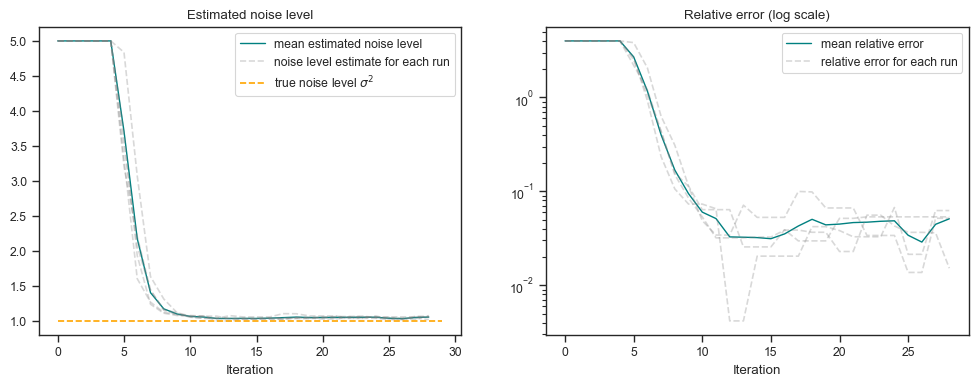

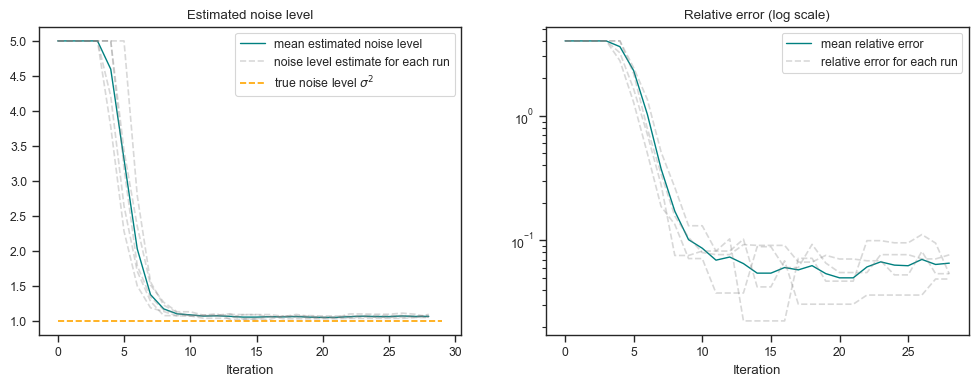

In [96]:
sns.set_context("paper")
plot_noise_error(noise_estimates_gf)
plot_noise_error(noise_estimates_gb)

(<matplotlib.patches.Rectangle at 0x167607e90>,
 (<matplotlib.patches.ConnectionPatch at 0x166914a10>,
  <matplotlib.patches.ConnectionPatch at 0x166bfa1e0>))

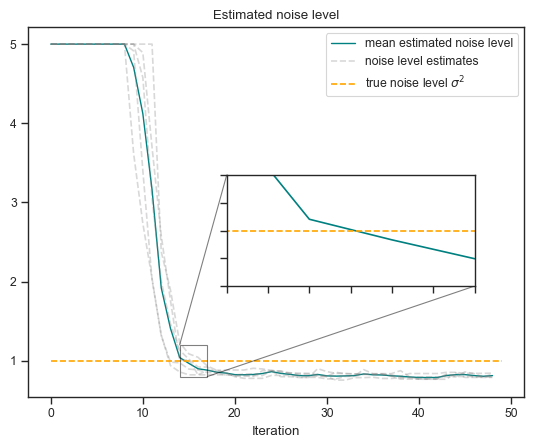

In [199]:
start, stop = 15, 25



fig, (ax1) = plt.subplots(1, 1, sharex=False)

mean_gf = np.mean(noise_estimates_gf, axis=0)
std_dev_gf = np.std(noise_estimates_gf, axis=0)
x = [i for i in range(number_of_iterations)]

ax1.set_title("Estimated noise level")
ax1.plot(mean_gf[1:], c="teal", linewidth=1., label=r"mean estimated noise level")
#ax1.fill_between(x[1:], (mean-std_dev)[1:], (mean+std_dev)[1:], color="orange", alpha=.1, label="+- std dev")
plots_1 = [ax1.plot(noise_estimates_gf[i, 1:], color="gray", linestyle="dashed", alpha=.3, label="noise level estimates" if i==0 else None) for i in range(number_of_runs)]
ax1.plot([error_sigma for i in range(len(noise_estimates_gf[0,:]))], c="orange", linestyle="dashed", label=r"true noise level $\sigma^2$")
ax1.set_xlabel("Iteration")
#plt.ylabel("Noise level")
ax1.legend()

distances_gf = np.abs(noise_estimates_gf - error_sigma)
mean_distances_gf = np.mean(distances_gf, axis=0)
std_distances_gf = np.std(distances_gf, axis=0)
#ax2.set_title("Relative error (log scale)")
#ax2.plot(mean_distances_gf[1:]/error_sigma, c="teal", linewidth=1., label=r"mean relative error $\frac{|\sigma^2 - \tilde{\sigma}^2|}{\sigma^2}$")
#plots_2 = [ax2.plot(distances[i, 1:]/error_sigma, color="gray", linestyle="dashed", alpha=.3, label=r"relative errors $\frac{|\sigma^2 - \tilde{\sigma}^2|}{\sigma^2}$" if i==0 else None) for i in range(number_of_runs)]
#ax2.fill_between(x[1:], (mean_distances-std_distances)[1:], (mean_distances+std_distances)[1:], color="orange", alpha=.1)
#ax2.set_xlabel("Iteration")
#plt.ylabel("Noise level")
#ax2.set_xscale("log")
#ax2.set_yscale("log")
#ax2.legend()

#fig.suptitle("Gradient-free Langevin EM")
zoom = noise_estimates_gf[:, 13:18]
x_iters = [i for i in range(13, 18)]
x1, x2, y1, y2 = 14, 17, .8, 1.2  # subregion of the original image
axins = ax1.inset_axes([.4, .3, .5, .3], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
#axins2 = ax2.inset_axes([.4, .3, .5, .3], xlim=(x1, x2), ylim=(0.07, 0.1), xticklabels=[], yticklabels=[])
axins.plot(x_iters, np.mean(zoom, axis=0), c="teal", label="mean estimated noise level")
axins.plot(x_iters, error_sigma*np.ones(len(zoom[0, :])), c="orange", linestyle="dashed", label="true noise level")
ax1.indicate_inset_zoom(axins, edgecolor="black")
#ax2.indicate_inset_zoom(axins2, edgecolor="black")

In [111]:
max_N = 8
runs_for_averaging = 5
number_of_observations = [2**i for i in range(1, max_N)]
number_of_samples = 50
parameter_estimates_inc_obs = np.zeros((max_N, D, number_of_samples, runs_for_averaging))
noise_estimates_inc_obs = np.zeros((max_N, runs_for_averaging))

for i, n_obs in enumerate(number_of_observations):
    G = lambda u: [u[0]*x**2 + u[1] for x in np.linspace(-10, 10, n_obs)]  # R^2 -> R^10
    G_prime = lambda u: np.array([[x**2, 1] for x in np.linspace(-10, 10, n_obs)])

    print(f"Performing LEM with {n_obs} observations...")
    error_covariance = error_sigma * np.eye(n_obs)
    error_mean = np.zeros(n_obs)

    measurement_error = np.random.multivariate_normal(error_mean, error_covariance)
    observations = [G(true_parameter) + measurement_error]

    estimated_parameter = []
    
    initial_noise_estimate = 5.
    for j in range(runs_for_averaging):
        lem = LEM(observations=observations,
                samples_per_observation=number_of_samples,
                forward_map=G,
                forward_gradient=G_prime,
                prior_mean=prior_mean,
                prior_covariance=prior_variance,
                number_of_iterations=20,
                initial_noise_estimate=initial_noise_estimate,
                dimensions=(D, n_obs),
                sampler_steps=300,
                gradient_free=False,
                verbose=False)
        lem.max_step_size = 0.01

        #lem.single_problem = True
        lem.number_of_observations = 1
    
        lem.generate_initial_ensembles()
        #initial_ensembles = lem.ensembles.copy()
        ensembles, noise_estimate = lem.EM(verbose=False)
        noise_estimates_inc_obs[i, j] = noise_estimate
        parameter_estimates_inc_obs[i, :, :, j] = ensembles
        print(f"Noise difference: {np.abs(lem.noise_estimate - error_sigma)}")

Performing LEM with 2 observations...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 872.69it/s]


Noise difference: 0.44846141186641764


ALDI: 100%|██████████| 300/300 [00:00<00:00, 846.96it/s]


Noise difference: 0.49298645549429254


ALDI: 100%|██████████| 300/300 [00:00<00:00, 884.45it/s]


Noise difference: 0.4910855205966661


ALDI: 100%|██████████| 300/300 [00:00<00:00, 845.14it/s]


Noise difference: 0.4743875863691457


ALDI: 100%|██████████| 300/300 [00:00<00:00, 877.39it/s]


Noise difference: 0.5094398887968076
Performing LEM with 4 observations...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 688.74it/s]


Noise difference: 0.3190045761454865


ALDI: 100%|██████████| 300/300 [00:00<00:00, 818.94it/s]


Noise difference: 0.34058106057793314


ALDI: 100%|██████████| 300/300 [00:00<00:00, 818.40it/s]


Noise difference: 0.50198646374808


ALDI: 100%|██████████| 300/300 [00:00<00:00, 807.80it/s]


Noise difference: 0.3255716300391194


ALDI: 100%|██████████| 300/300 [00:00<00:00, 836.40it/s]


Noise difference: 0.3845642375122673
Performing LEM with 8 observations...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 734.19it/s]


Noise difference: 0.523773718017772


ALDI: 100%|██████████| 300/300 [00:00<00:00, 708.85it/s]


Noise difference: 0.6695066765159026


ALDI: 100%|██████████| 300/300 [00:00<00:00, 646.03it/s]


Noise difference: 0.6513255997871967


ALDI: 100%|██████████| 300/300 [00:00<00:00, 715.68it/s]


Noise difference: 0.609977901206249


ALDI: 100%|██████████| 300/300 [00:00<00:00, 735.26it/s]


Noise difference: 0.6823940988719275
Performing LEM with 16 observations...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 620.40it/s]


Noise difference: 0.16855947037439845


ALDI: 100%|██████████| 300/300 [00:00<00:00, 623.71it/s]


Noise difference: 0.17637364131226851


ALDI: 100%|██████████| 300/300 [00:00<00:00, 617.05it/s]


Noise difference: 0.19055190386503928


ALDI: 100%|██████████| 300/300 [00:00<00:00, 618.97it/s]


Noise difference: 0.17434030180891258


ALDI: 100%|██████████| 300/300 [00:00<00:00, 618.82it/s]


Noise difference: 0.16765548922443685
Performing LEM with 32 observations...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 430.34it/s]


Noise difference: 0.21454975883976446


ALDI: 100%|██████████| 300/300 [00:00<00:00, 473.28it/s]


Noise difference: 0.2211483688064081


ALDI: 100%|██████████| 300/300 [00:00<00:00, 469.92it/s]


Noise difference: 0.2095389530119841


ALDI: 100%|██████████| 300/300 [00:00<00:00, 468.70it/s]


Noise difference: 0.2151782860857806


ALDI: 100%|██████████| 300/300 [00:00<00:00, 464.87it/s]


Noise difference: 0.21081574767771316
Performing LEM with 64 observations...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 311.39it/s]


Noise difference: 0.10416022594226959


ALDI: 100%|██████████| 300/300 [00:00<00:00, 315.31it/s]


Noise difference: 0.10263020234854647


ALDI: 100%|██████████| 300/300 [00:00<00:00, 314.98it/s]


Noise difference: 0.10682730362340243


ALDI: 100%|██████████| 300/300 [00:00<00:00, 313.60it/s]


Noise difference: 0.10044166489721462


ALDI: 100%|██████████| 300/300 [00:00<00:00, 314.42it/s]


Noise difference: 0.1016220054216811
Performing LEM with 128 observations...


ALDI: 100%|██████████| 300/300 [00:01<00:00, 187.16it/s]


Noise difference: 0.04232951807532537


ALDI: 100%|██████████| 300/300 [00:01<00:00, 188.77it/s]


Noise difference: 0.0425685151207289


ALDI: 100%|██████████| 300/300 [00:01<00:00, 184.36it/s]


Noise difference: 0.03742594891800133


ALDI: 100%|██████████| 300/300 [00:01<00:00, 185.61it/s]


Noise difference: 0.04002559591019472


ALDI: 100%|██████████| 300/300 [00:01<00:00, 183.99it/s]

Noise difference: 0.04378748722123693


[0.48327217 0.37434159 0.6273956  0.17549616 0.21424622 0.10313628
 0.04122741 1.        ]


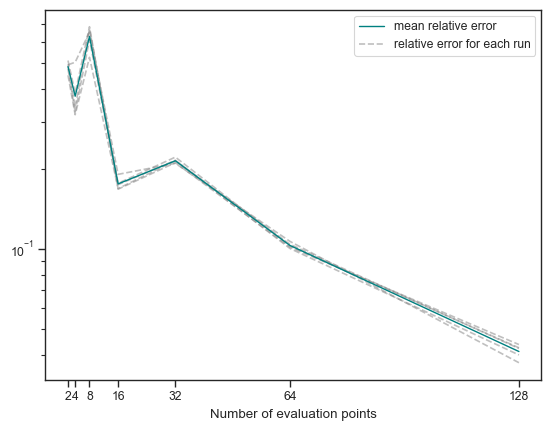

In [145]:
plt.plot(number_of_observations, np.abs(np.mean(noise_estimates_inc_obs[:-1, :], axis=1)-error_sigma)/error_sigma, color="teal", label="mean relative error", linewidth=1., zorder=3)
_ = [plt.plot(number_of_observations, np.abs(noise_estimates_inc_obs[:-1, i] - error_sigma)/error_sigma, color="grey", alpha=.5, linestyle="dashed", label="relative error for each run" if i==0 else None) for i in range(runs_for_averaging)]
plt.xlabel("Number of evaluation points")
plt.legend()
plt.xticks(number_of_observations)
#plt.xscale("log")
plt.yscale("log")

print(np.abs(np.mean(noise_estimates_inc_obs, axis=1)-error_sigma)/error_sigma)

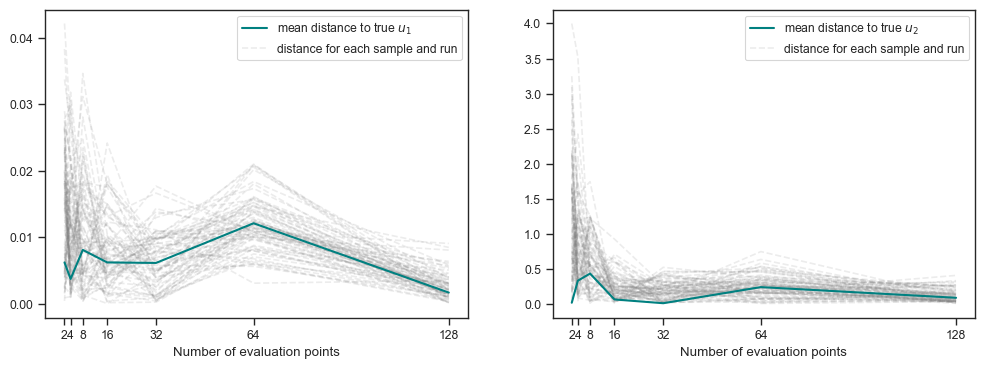

In [120]:
figure, (a1, a2) = plt.subplots(1,2, figsize=(12,4))

mean_parameter_est_inc_obs = np.mean(parameter_estimates_inc_obs, axis=3)
a1.plot(number_of_observations, np.abs(np.mean(mean_parameter_est_inc_obs, axis=2)[:-1, 0]-2), color="teal", linewidth=1.5, zorder=3, label=r"mean distance to true $u_1$")
a2.plot(number_of_observations, np.abs(np.mean(mean_parameter_est_inc_obs, axis=2)[:-1, 1]-2), color="teal", linewidth=1.5, zorder=3, label=r"mean distance to true $u_2$")

a1.set_xticks(number_of_observations)
a1.set_xlabel("Number of evaluation points")
a2.set_xticks(number_of_observations)
a2.set_xlabel("Number of evaluation points")

_ = [[a1.plot(number_of_observations, np.abs(parameter_estimates_inc_obs[:-1, 0, j, i]-2), color="grey", linestyle="dashed", alpha=.15, label="distance for each sample and run" if j==1 and i==1 else None) for i in range(runs_for_averaging)] for j in range(15)]
_ = [[a2.plot(number_of_observations, np.abs(parameter_estimates_inc_obs[:-1, 1, j, i]-2), color="grey", linestyle="dashed", alpha=.15, label="distance for each sample and run" if j==1 and i==1 else None) for i in range(runs_for_averaging)] for j in range(15)]
a1.legend()
a2.legend()

In [130]:
n_observations = 8
n_runs = 5
N = 11
measurement_error = multivariate_normal.rvs(np.zeros(N), np.eye(N), n_observations)
many_observations = np.array([G(true_parameter) + measurement_error]).squeeze()
noise_estimates_many_obs = np.zeros((n_observations, n_runs))

for i in range(1, n_observations):
    print(f"\n{i} observations:")
    observations = many_observations[:i+1, :]
    for j in tqdm(range(n_runs)):
        lem_many = LEM(observations,
                    15,
                    G,
                    G_prime,
                    prior_mean,
                    prior_variance,
                    30,
                    5.,
                    (2, 10),
                    300,
                    False,
                    False)
        lem_many.max_step_size = 0.01
        lem_many.generate_initial_ensembles()
        samples, noise_estimate = lem_many.EM(verbose=False)
        print(f"noise estimate {j} for {i} observations: {noise_estimate}")
        noise_estimates_many_obs[i,j] = noise_estimate


1 observations:


 20%|██        | 1/5 [00:09<00:36,  9.20s/it]

noise estimate 0 for 1 observations: 1.2434287596788083


 40%|████      | 2/5 [00:18<00:28,  9.37s/it]

noise estimate 1 for 1 observations: 1.2472215228098256


 60%|██████    | 3/5 [00:28<00:18,  9.38s/it]

noise estimate 2 for 1 observations: 1.3134074428593112


 80%|████████  | 4/5 [00:37<00:09,  9.42s/it]

noise estimate 3 for 1 observations: 1.2758917367141145


100%|██████████| 5/5 [00:47<00:00,  9.44s/it]


noise estimate 4 for 1 observations: 1.284765704639024

2 observations:


 20%|██        | 1/5 [00:14<00:57, 14.31s/it]

noise estimate 0 for 2 observations: 1.5252704202290985


 40%|████      | 2/5 [00:28<00:42, 14.30s/it]

noise estimate 1 for 2 observations: 1.5552208951421729


 60%|██████    | 3/5 [00:42<00:28, 14.23s/it]

noise estimate 2 for 2 observations: 1.4717478734717135


 80%|████████  | 4/5 [00:57<00:14, 14.35s/it]

noise estimate 3 for 2 observations: 1.4922124962054175


100%|██████████| 5/5 [01:11<00:00, 14.23s/it]


noise estimate 4 for 2 observations: 1.4802531642641608

3 observations:


 20%|██        | 1/5 [00:18<01:15, 18.76s/it]

noise estimate 0 for 3 observations: 1.2364000362832188


 40%|████      | 2/5 [00:37<00:56, 18.69s/it]

noise estimate 1 for 3 observations: 1.181758193300882


 60%|██████    | 3/5 [00:56<00:37, 18.73s/it]

noise estimate 2 for 3 observations: 1.237478288345418


 80%|████████  | 4/5 [01:14<00:18, 18.69s/it]

noise estimate 3 for 3 observations: 1.22036891855166


100%|██████████| 5/5 [01:33<00:00, 18.70s/it]


noise estimate 4 for 3 observations: 1.2280967867701789

4 observations:


 20%|██        | 1/5 [00:23<01:33, 23.49s/it]

noise estimate 0 for 4 observations: 1.2034796429608965


 40%|████      | 2/5 [00:46<01:09, 23.18s/it]

noise estimate 1 for 4 observations: 1.1931017548037908


 60%|██████    | 3/5 [01:10<00:47, 23.50s/it]

noise estimate 2 for 4 observations: 1.2300307906012986


 80%|████████  | 4/5 [01:33<00:23, 23.56s/it]

noise estimate 3 for 4 observations: 1.2098067229478837


100%|██████████| 5/5 [01:57<00:00, 23.48s/it]


noise estimate 4 for 4 observations: 1.1824548453041435

5 observations:


 20%|██        | 1/5 [00:28<01:54, 28.55s/it]

noise estimate 0 for 5 observations: 1.08741393578491


 40%|████      | 2/5 [00:56<01:23, 27.91s/it]

noise estimate 1 for 5 observations: 1.0639528114179397


 60%|██████    | 3/5 [01:22<00:54, 27.16s/it]

noise estimate 2 for 5 observations: 1.0936154426550517


 80%|████████  | 4/5 [01:48<00:26, 26.77s/it]

noise estimate 3 for 5 observations: 1.060095277656921


100%|██████████| 5/5 [02:14<00:00, 26.95s/it]


noise estimate 4 for 5 observations: 1.0679848831054926

6 observations:


 20%|██        | 1/5 [00:32<02:10, 32.52s/it]

noise estimate 0 for 6 observations: 1.0956673951781297


 40%|████      | 2/5 [01:04<01:37, 32.37s/it]

noise estimate 1 for 6 observations: 1.1140599973105123


 60%|██████    | 3/5 [01:36<01:04, 32.20s/it]

noise estimate 2 for 6 observations: 1.0838902610953443


 80%|████████  | 4/5 [02:09<00:32, 32.26s/it]

noise estimate 3 for 6 observations: 1.0904379831986917


100%|██████████| 5/5 [02:41<00:00, 32.22s/it]


noise estimate 4 for 6 observations: 1.1148719581562139

7 observations:


 20%|██        | 1/5 [00:36<02:27, 37.00s/it]

noise estimate 0 for 7 observations: 1.080318316716568


 40%|████      | 2/5 [01:13<01:50, 36.95s/it]

noise estimate 1 for 7 observations: 1.0285769211855875


 60%|██████    | 3/5 [01:50<01:13, 36.81s/it]

noise estimate 2 for 7 observations: 1.0637538339141015


 80%|████████  | 4/5 [02:27<00:36, 36.83s/it]

noise estimate 3 for 7 observations: 1.0425082931591925


100%|██████████| 5/5 [03:04<00:00, 36.81s/it]

noise estimate 4 for 7 observations: 1.0387627791165508


Text(0.5, 0, 'Number of observations')

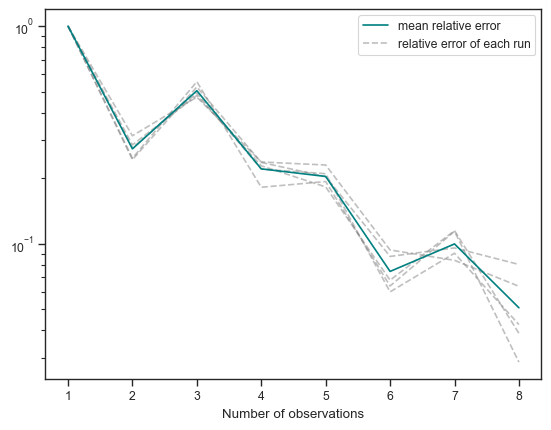

In [131]:
x_obs = [i for i in range(1, n_observations+1)]
plt.plot(x_obs, np.abs(np.mean(noise_estimates_many_obs, axis=1)-error_sigma)/error_sigma, label="mean relative error", zorder=3, color="teal")
_ = [plt.plot(x_obs, np.abs(noise_estimates_many_obs[:,i]-error_sigma)/error_sigma, color="grey", alpha=.5, linestyle="dashed", label="relative error of each run" if i==0 else None) for i in range(n_runs)]
plt.yscale("log")
plt.legend()
plt.xlabel("Number of observations")

Text(0, 0.5, 'Relative error')

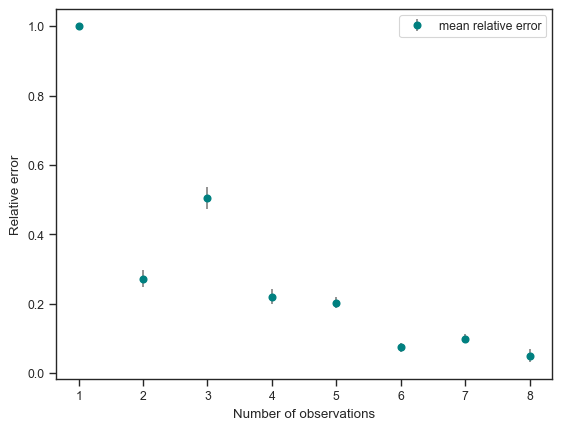

In [132]:
x_obs = [i for i in range(1, n_observations+1)]

# Mean and standard deviation of relative errors
mean_rel_error_inc_o = np.mean(np.abs(noise_estimates_many_obs - error_sigma) / error_sigma, axis=1)
std_rel_error_inc_o = np.std(np.abs(noise_estimates_many_obs - error_sigma) / error_sigma, axis=1)

# Plot mean relative error with error bars
plt.errorbar(x_obs, mean_rel_error_inc_o, yerr=std_rel_error_inc_o, label="mean relative error", fmt='o', color="teal", zorder=3, ecolor="grey")

plt.legend()
plt.xlabel("Number of observations")
plt.ylabel("Relative error")
#plt.grid(True)

In [36]:
from timeit import default_timer as timer
sampler_steps = [500, 1000, 1500, 2000, 2500, 3000]
step_sizes = [0.1, 0.015, 0.01, 0.0015, 0.001, 0.00015]
n_runs = 15
n_iter = 5
N = 11
error_sigma = 1.
error_covariance = error_sigma * np.eye(N)
error_mean = np.zeros(N)

G = lambda u: [u[0]*x**2 + u[1] for x in np.linspace(-10, 10, N)]  # R^2 -> R^10
G_prime = lambda u: np.array([[x**2, 1] for x in np.linspace(-10, 10, N)])

measurement_error = np.random.multivariate_normal(error_mean, error_covariance)
observation = np.array([G(true_parameter) + measurement_error])

n_samples = 20

ensemble = multivariate_normal.rvs(mean=(4,2), cov=2*np.eye(2), size=n_samples).T
initial_ensemble = ensemble.copy()
noise_level = 10.

length = len(sampler_steps) * n_iter
noise_archive_steps = np.zeros((n_runs, length))
noise_archive_steps_gf = np.zeros((n_runs, length))
noise_archive_steps_comp = np.zeros((n_runs, length))

time_steps = np.zeros((n_runs))
time_steps_gf = np.zeros((n_runs))
time_comp = np.zeros((n_runs))

for run in tqdm(range(n_runs), desc="Averaging runs"):
    print(f"#### RUN {run+1} ####\n")
    # GRADIENT-BASED VARIABLE SAMPLER STEPS
    noise_level = 10.
    ensemble = initial_ensemble.copy()
    t_start = timer()
    for i, steps in enumerate(sampler_steps):
        print(f"Performing {n_iter} EM-loops with {steps} ALDI-steps...")
        lem_steps = LEM(observations=observation,
                        samples_per_observation=n_samples,
                        forward_map=G,
                        forward_gradient=G_prime,
                        prior_mean=prior_mean,
                        prior_covariance=prior_variance,
                        number_of_iterations=n_iter,
                        initial_noise_estimate=noise_level,
                        dimensions=(2,11),
                        sampler_steps=steps,
                        gradient_free=False,
                        verbose=False)
        lem_steps.max_step_size = step_sizes[i]
        lem_steps.ensembles = ensemble
        ensemble, noise_levels = lem_steps.EM(return_archive=True)
        noise_level = noise_levels[-1]
        print(f"Current noise estimate: {noise_level}")
        noise_archive_steps[run, n_iter*i:n_iter*(i+1)] = noise_levels
    t_end = timer()
    time_steps[run] = t_end-t_start
    print(f"Execution took {time_steps[run]:.3f} seconds.")
    print(f"Final noise estimate: {noise_archive_steps[run, -1]}")
    print("\n")

    # GRADIENT-FREE VARIABLE SAMPLER STEPS
    ensemble = initial_ensemble.copy()
    noise_level = 10.
    t_start = timer()
    for i, steps in enumerate(sampler_steps):
        print(f"Performing {n_iter} gradient-free EM-loops with {steps} ALDI-steps...")
        lem_steps_gf = LEM(observations=observation,
                        samples_per_observation=n_samples,
                        forward_map=G,
                        forward_gradient=G_prime,
                        prior_mean=prior_mean,
                        prior_covariance=prior_variance,
                        number_of_iterations=n_iter,
                        initial_noise_estimate=noise_level,
                        dimensions=(2,11),
                        sampler_steps=steps,
                        gradient_free=True,
                        verbose=False)
        lem_steps_gf.max_step_size = step_sizes[i]
        lem_steps_gf.ensembles = ensemble
        ensemble, noise_levels = lem_steps_gf.EM(return_archive=True)
        noise_level = noise_levels[-1]
        print(f"Current noise estimate: {noise_level}")
        noise_archive_steps_gf[run, n_iter*i:n_iter*(i+1)] = noise_levels
    t_end = timer()
    time_steps_gf[run] = t_end-t_start
    print(f"Execution took {time_steps_gf[run]:.3f} seconds.")
    print(f"Final noise estimate: {noise_archive_steps_gf[run, -1]}")
    print("\n")

    # GRADIENT-BASED FIXED SAMPLER STEPS
    ensemble = initial_ensemble.copy()
    t_start = timer()
    print(f"Performing {length} EM-loops with {3000} ALDI-steps...")
    lem_steps_comp = LEM(observations=observation,
                        samples_per_observation=n_samples,
                        forward_map=G,
                        forward_gradient=G_prime,
                        prior_mean=prior_mean,
                        prior_covariance=prior_variance,
                        number_of_iterations=length,
                        initial_noise_estimate=10.,
                        dimensions=(2,11),
                        sampler_steps=3000,
                        gradient_free=False,
                        verbose=False)
    lem_steps_comp.max_step_size = step_sizes[-3]
    lem_steps_comp.ensembles = ensemble
    ensemble_comp, noise_archive = lem_steps_comp.EM(return_archive=True)
    noise_archive_steps_comp[run, :] = noise_archive
    t_end = timer()
    time_comp[run] = t_end - t_start
    print(f"Execution took {time_comp[run]:.3f} seconds.")
    print(f"Final noise estimate: {noise_archive_steps_comp[run, -1]}")

Averaging runs:   0%|          | 0/15 [00:00<?, ?it/s]

#### RUN 1 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1475.09it/s]


Current noise estimate: 1.2612609400435075
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1588.23it/s]


Current noise estimate: 1.2499117968389915
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:01<00:00, 1471.57it/s]


Current noise estimate: 1.2499117968389915
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1612.96it/s]


Current noise estimate: 1.2499117968389915
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1549.25it/s]


Current noise estimate: 1.2499117968389915
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1617.64it/s]


Current noise estimate: 1.2499117968389915
Execution took 33.222 seconds.
Final noise estimate: 1.2499117968389915


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1936.12it/s]


Current noise estimate: 1.236591342046757
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1924.04it/s]


Current noise estimate: 1.2340420355293087
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1946.37it/s]


Current noise estimate: 1.2340420355293087
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1955.34it/s]


Current noise estimate: 1.2340420355293087
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1961.07it/s]


Current noise estimate: 1.2340420355293087
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1895.74it/s]


Current noise estimate: 1.2340420355293087
Execution took 27.364 seconds.
Final noise estimate: 1.2340420355293087


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs:   7%|▋         | 1/15 [01:54<26:49, 114.96s/it]

Execution took 54.372 seconds.
Final noise estimate: 1.2876104934796868
#### RUN 2 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1719.03it/s]


Current noise estimate: 1.437219797430954
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1647.53it/s]


Current noise estimate: 1.3576747869949344
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1585.65it/s]


Current noise estimate: 1.355915185654047
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1716.95it/s]


Current noise estimate: 1.3154838315260562
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1692.22it/s]


Current noise estimate: 1.3154838315260562
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1693.04it/s]


Current noise estimate: 1.3154838315260562
Execution took 31.426 seconds.
Final noise estimate: 1.3154838315260562


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 2019.49it/s]


Current noise estimate: 1.2868239391263867
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1987.41it/s]


Current noise estimate: 1.2868239391263867
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 2029.12it/s]


Current noise estimate: 1.2868239391263867
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1974.40it/s]


Current noise estimate: 1.286538807123533
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 2083.52it/s]


Current noise estimate: 1.263670308805634
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 2021.46it/s]


Current noise estimate: 1.232588557084157
Execution took 26.116 seconds.
Final noise estimate: 1.232588557084157


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs:  13%|█▎        | 2/15 [03:46<24:26, 112.83s/it]

Execution took 53.798 seconds.
Final noise estimate: 1.244960487357991
#### RUN 3 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1693.86it/s]


Current noise estimate: 1.4137716564309257
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1709.29it/s]


Current noise estimate: 1.3292832023250127
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1636.01it/s]


Current noise estimate: 1.3067858848342042
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1671.16it/s]


Current noise estimate: 1.3051489181980982
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1644.36it/s]


Current noise estimate: 1.252255465402382
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1664.78it/s]


Current noise estimate: 1.252255465402382
Execution took 31.943 seconds.
Final noise estimate: 1.252255465402382


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 2046.23it/s]


Current noise estimate: 1.3862642380365753
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 2061.60it/s]


Current noise estimate: 1.2672240670374613
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 2058.79it/s]


Current noise estimate: 1.2446604898897191
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:00<00:00, 2078.02it/s]


Current noise estimate: 1.224671722436699
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1979.33it/s]


Current noise estimate: 1.224671722436699
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 2050.82it/s]


Current noise estimate: 1.224671722436699
Execution took 25.733 seconds.
Final noise estimate: 1.224671722436699


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs:  20%|██        | 3/15 [05:37<22:25, 112.08s/it]

Execution took 53.516 seconds.
Final noise estimate: 1.3153853553161843
#### RUN 4 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1691.82it/s]


Current noise estimate: 1.2570258985045295
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1694.17it/s]


Current noise estimate: 1.2303341567012558
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1706.56it/s]


Current noise estimate: 1.2303341567012558
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1713.54it/s]


Current noise estimate: 1.2303341567012558
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1718.75it/s]


Current noise estimate: 1.2303341567012558
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1716.24it/s]


Current noise estimate: 1.2303341567012558
Execution took 31.499 seconds.
Final noise estimate: 1.2303341567012558


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 2060.61it/s]


Current noise estimate: 1.285610814323135
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 2038.95it/s]


Current noise estimate: 1.2678842712384042
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1894.92it/s]


Current noise estimate: 1.2678842712384042
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1700.92it/s]


Current noise estimate: 1.25410406522071
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 2083.88it/s]


Current noise estimate: 1.25410406522071
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1914.70it/s]


Current noise estimate: 1.2200208533202248
Execution took 26.214 seconds.
Final noise estimate: 1.2200208533202248


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs:  27%|██▋       | 4/15 [07:28<20:27, 111.55s/it]

Execution took 53.024 seconds.
Final noise estimate: 1.3615523647150762
#### RUN 5 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1715.51it/s]


Current noise estimate: 1.3632926690801732
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1717.67it/s]


Current noise estimate: 1.2804793094784737
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1720.41it/s]


Current noise estimate: 1.270555139325595
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1555.44it/s]


Current noise estimate: 1.270555139325595
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1730.22it/s]


Current noise estimate: 1.270555139325595
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1657.33it/s]


Current noise estimate: 1.2457360801860853
Execution took 31.535 seconds.
Final noise estimate: 1.2457360801860853


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 2037.29it/s]


Current noise estimate: 1.2526639240585329
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 2073.86it/s]


Current noise estimate: 1.2447025727963215
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 2088.01it/s]


Current noise estimate: 1.2447025727963215
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:00<00:00, 2067.59it/s]


Current noise estimate: 1.2447025727963215
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 2087.33it/s]


Current noise estimate: 1.2447025727963215
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 2055.00it/s]


Current noise estimate: 1.2332282545244655
Execution took 25.630 seconds.
Final noise estimate: 1.2332282545244655


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs:  33%|███▎      | 5/15 [09:19<18:33, 111.34s/it]

Execution took 53.800 seconds.
Final noise estimate: 1.27059331727877
#### RUN 6 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1713.11it/s]


Current noise estimate: 1.4020166993829155
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1706.33it/s]


Current noise estimate: 1.316173825779784
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1718.00it/s]


Current noise estimate: 1.299404440548192
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1708.06it/s]


Current noise estimate: 1.2471730140822366
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1716.69it/s]


Current noise estimate: 1.2471730140822366
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1712.04it/s]


Current noise estimate: 1.2471730140822366
Execution took 31.114 seconds.
Final noise estimate: 1.2471730140822366


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 2052.33it/s]


Current noise estimate: 1.267997884679251
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 2090.92it/s]


Current noise estimate: 1.2256007078148332
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1924.52it/s]


Current noise estimate: 1.2256007078148332
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1723.56it/s]


Current noise estimate: 1.2256007078148332
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1992.57it/s]


Current noise estimate: 1.2256007078148332
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 2081.20it/s]


Current noise estimate: 1.2256007078148332
Execution took 25.729 seconds.
Final noise estimate: 1.2256007078148332


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs:  40%|████      | 6/15 [11:10<16:41, 111.22s/it]

Execution took 54.149 seconds.
Final noise estimate: 1.3372101099851637
#### RUN 7 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1703.10it/s]


Current noise estimate: 1.254088451212179
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1714.77it/s]


Current noise estimate: 1.254088451212179
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1689.73it/s]


Current noise estimate: 1.254088451212179
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1710.37it/s]


Current noise estimate: 1.254088451212179
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1712.61it/s]


Current noise estimate: 1.254088451212179
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1707.30it/s]


Current noise estimate: 1.254088451212179
Execution took 31.402 seconds.
Final noise estimate: 1.254088451212179


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 2048.98it/s]


Current noise estimate: 1.215867423654559
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 2076.54it/s]


Current noise estimate: 1.215867423654559
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 2075.13it/s]


Current noise estimate: 1.215867423654559
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:00<00:00, 2073.27it/s]


Current noise estimate: 1.215867423654559
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 2055.14it/s]


Current noise estimate: 1.215867423654559
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 2063.65it/s]


Current noise estimate: 1.215867423654559
Execution took 25.719 seconds.
Final noise estimate: 1.215867423654559


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs:  47%|████▋     | 7/15 [13:00<14:48, 111.01s/it]

Execution took 53.461 seconds.
Final noise estimate: 1.2979572491175222
#### RUN 8 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1719.86it/s]


Current noise estimate: 1.3459908779306822
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1710.50it/s]


Current noise estimate: 1.3352242442496427
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1723.99it/s]


Current noise estimate: 1.2956437957248854
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1632.09it/s]


Current noise estimate: 1.2956437957248854
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1680.86it/s]


Current noise estimate: 1.2798059705795313
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1535.47it/s]


Current noise estimate: 1.2705702594295771
Execution took 31.422 seconds.
Final noise estimate: 1.2705702594295771


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1898.93it/s]


Current noise estimate: 1.2709804883969342
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1856.95it/s]


Current noise estimate: 1.252618222448448
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 2042.10it/s]


Current noise estimate: 1.252618222448448
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:00<00:00, 2086.85it/s]


Current noise estimate: 1.2494565853840651
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1989.35it/s]


Current noise estimate: 1.2494565853840651
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 2085.39it/s]


Current noise estimate: 1.2494565853840651
Execution took 26.073 seconds.
Final noise estimate: 1.2494565853840651


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs:  53%|█████▎    | 8/15 [14:51<12:56, 110.90s/it]

Execution took 53.164 seconds.
Final noise estimate: 1.3315082035989625
#### RUN 9 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1710.54it/s]


Current noise estimate: 1.337500468905544
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1723.62it/s]


Current noise estimate: 1.3029834018856787
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1707.45it/s]


Current noise estimate: 1.3029834018856787
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1713.76it/s]


Current noise estimate: 1.3029834018856787
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1707.86it/s]


Current noise estimate: 1.2692403637096146
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1709.71it/s]


Current noise estimate: 1.246932959475817
Execution took 31.154 seconds.
Final noise estimate: 1.246932959475817


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1629.38it/s]


Current noise estimate: 1.284367950092444
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 2042.39it/s]


Current noise estimate: 1.284367950092444
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 2077.46it/s]


Current noise estimate: 1.2680216193145004
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:00<00:00, 2053.52it/s]


Current noise estimate: 1.2680216193145004
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 2071.50it/s]


Current noise estimate: 1.2680216193145004
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 2087.75it/s]


Current noise estimate: 1.2680216193145004
Execution took 25.690 seconds.
Final noise estimate: 1.2680216193145004


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs:  60%|██████    | 9/15 [16:42<11:05, 110.96s/it]

Execution took 54.259 seconds.
Final noise estimate: 1.2254257206267354
#### RUN 10 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1703.59it/s]


Current noise estimate: 1.396535487582693
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1707.83it/s]


Current noise estimate: 1.2386271092036705
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1716.22it/s]


Current noise estimate: 1.2351609722184083
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1711.36it/s]


Current noise estimate: 1.2351609722184083
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1642.96it/s]


Current noise estimate: 1.2351609722184083
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1718.16it/s]


Current noise estimate: 1.2351609722184083
Execution took 31.093 seconds.
Final noise estimate: 1.2351609722184083


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 2068.83it/s]


Current noise estimate: 1.3345270612489784
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 2068.21it/s]


Current noise estimate: 1.2455696858733896
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 2075.75it/s]


Current noise estimate: 1.2455696858733896
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1977.68it/s]


Current noise estimate: 1.2455696858733896
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 2089.73it/s]


Current noise estimate: 1.2455696858733896
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 2012.34it/s]


Current noise estimate: 1.2455696858733896
Execution took 25.770 seconds.
Final noise estimate: 1.2455696858733896


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs:  67%|██████▋   | 10/15 [18:32<09:13, 110.77s/it]

Execution took 53.461 seconds.
Final noise estimate: 1.2416890716688163
#### RUN 11 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1711.62it/s]


Current noise estimate: 1.3884014431035767
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1539.62it/s]


Current noise estimate: 1.2779699142558663
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1608.01it/s]


Current noise estimate: 1.2779699142558663
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1591.96it/s]


Current noise estimate: 1.2349183290369097
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1719.08it/s]


Current noise estimate: 1.2349183290369097
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1643.76it/s]


Current noise estimate: 1.2349183290369097
Execution took 31.201 seconds.
Final noise estimate: 1.2349183290369097


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 2028.16it/s]


Current noise estimate: 1.263961585803379
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 2081.97it/s]


Current noise estimate: 1.263961585803379
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 2078.49it/s]


Current noise estimate: 1.263961585803379
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:00<00:00, 2074.18it/s]


Current noise estimate: 1.2156368870751615
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 2094.67it/s]


Current noise estimate: 1.2156368870751615
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 2073.05it/s]


Current noise estimate: 1.2156368870751615
Execution took 25.801 seconds.
Final noise estimate: 1.2156368870751615


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs:  73%|███████▎  | 11/15 [20:23<07:22, 110.68s/it]

Execution took 53.485 seconds.
Final noise estimate: 1.3290619323084147
#### RUN 12 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1713.68it/s]


Current noise estimate: 1.2398492765831288
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1709.37it/s]


Current noise estimate: 1.2398492765831288
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1709.90it/s]


Current noise estimate: 1.2398492765831288
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1703.17it/s]


Current noise estimate: 1.2398492765831288
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1692.35it/s]


Current noise estimate: 1.2398492765831288
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1684.67it/s]


Current noise estimate: 1.2398492765831288
Execution took 31.305 seconds.
Final noise estimate: 1.2398492765831288


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 2062.57it/s]


Current noise estimate: 1.3280985660615867
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 2074.57it/s]


Current noise estimate: 1.2803165515140604
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 2080.07it/s]


Current noise estimate: 1.2497816962563228
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1985.46it/s]


Current noise estimate: 1.2497816962563228
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 2075.34it/s]


Current noise estimate: 1.21986943116738
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 2081.20it/s]


Current noise estimate: 1.21986943116738
Execution took 25.653 seconds.
Final noise estimate: 1.21986943116738


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs:  80%|████████  | 12/15 [22:13<05:31, 110.59s/it]

Execution took 53.464 seconds.
Final noise estimate: 1.3882662407568294
#### RUN 13 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1684.51it/s]


Current noise estimate: 1.24367587682676
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1525.36it/s]


Current noise estimate: 1.24367587682676
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1713.11it/s]


Current noise estimate: 1.24367587682676
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1648.93it/s]


Current noise estimate: 1.24367587682676
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1722.40it/s]


Current noise estimate: 1.2282314261366878
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1663.72it/s]


Current noise estimate: 1.2282314261366878
Execution took 31.114 seconds.
Final noise estimate: 1.2282314261366878


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 2042.57it/s]


Current noise estimate: 1.2918816365886712
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 2079.13it/s]


Current noise estimate: 1.2467704185247264
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 2073.66it/s]


Current noise estimate: 1.2467704185247264
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:00<00:00, 2084.38it/s]


Current noise estimate: 1.2467704185247264
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 2065.82it/s]


Current noise estimate: 1.2467704185247264
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 2078.76it/s]


Current noise estimate: 1.2467704185247264
Execution took 25.816 seconds.
Final noise estimate: 1.2467704185247264


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs:  87%|████████▋ | 13/15 [24:04<03:41, 110.58s/it]

Execution took 53.619 seconds.
Final noise estimate: 1.3492358728024059
#### RUN 14 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1725.00it/s]


Current noise estimate: 1.3943828384144787
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1559.34it/s]


Current noise estimate: 1.3326090526796641
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1710.14it/s]


Current noise estimate: 1.2868982371376494
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1612.93it/s]


Current noise estimate: 1.2547515141073777
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1707.40it/s]


Current noise estimate: 1.2419020456272063
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1651.38it/s]


Current noise estimate: 1.2419020456272063
Execution took 31.434 seconds.
Final noise estimate: 1.2419020456272063


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 2044.72it/s]


Current noise estimate: 1.2505477687963462
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 2071.32it/s]


Current noise estimate: 1.2505477687963462
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 2066.63it/s]


Current noise estimate: 1.2505477687963462
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:00<00:00, 2082.24it/s]


Current noise estimate: 1.2505477687963462
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 2079.32it/s]


Current noise estimate: 1.2474770980545855
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1992.81it/s]


Current noise estimate: 1.2474770980545855
Execution took 25.703 seconds.
Final noise estimate: 1.2474770980545855


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs:  93%|█████████▎| 14/15 [25:55<01:50, 110.68s/it]

Execution took 53.784 seconds.
Final noise estimate: 1.396139297303177
#### RUN 15 ####

Performing 5 EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 1682.91it/s]


Current noise estimate: 1.3923600863551147
Performing 5 EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 1527.62it/s]


Current noise estimate: 1.3836785921739534
Performing 5 EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1685.51it/s]


Current noise estimate: 1.3241870422566713
Performing 5 EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1704.35it/s]


Current noise estimate: 1.2772501182602218
Performing 5 EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1697.71it/s]


Current noise estimate: 1.2772501182602218
Performing 5 EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 1656.13it/s]


Current noise estimate: 1.2410771789427981
Execution took 31.465 seconds.
Final noise estimate: 1.2410771789427981


Performing 5 gradient-free EM-loops with 500 ALDI-steps...


ALDI: 100%|██████████| 500/500 [00:00<00:00, 2045.36it/s]


Current noise estimate: 1.3056709626753387
Performing 5 gradient-free EM-loops with 1000 ALDI-steps...


ALDI: 100%|██████████| 1000/1000 [00:00<00:00, 2061.64it/s]


Current noise estimate: 1.212743992802113
Performing 5 gradient-free EM-loops with 1500 ALDI-steps...


ALDI: 100%|██████████| 1500/1500 [00:00<00:00, 1893.95it/s]


Current noise estimate: 1.212743992802113
Performing 5 gradient-free EM-loops with 2000 ALDI-steps...


ALDI: 100%|██████████| 2000/2000 [00:01<00:00, 1921.88it/s]


Current noise estimate: 1.212743992802113
Performing 5 gradient-free EM-loops with 2500 ALDI-steps...


ALDI: 100%|██████████| 2500/2500 [00:01<00:00, 1990.84it/s]


Current noise estimate: 1.212743992802113
Performing 5 gradient-free EM-loops with 3000 ALDI-steps...


ALDI: 100%|██████████| 3000/3000 [00:01<00:00, 2087.00it/s]


Current noise estimate: 1.212743992802113
Execution took 25.872 seconds.
Final noise estimate: 1.212743992802113


Performing 30 EM-loops with 3000 ALDI-steps...


Averaging runs: 100%|██████████| 15/15 [27:45<00:00, 111.06s/it]

Execution took 53.294 seconds.
Final noise estimate: 1.2778774280582907


Text(0.5, 1.0, 'Mean execution time (minutes)')

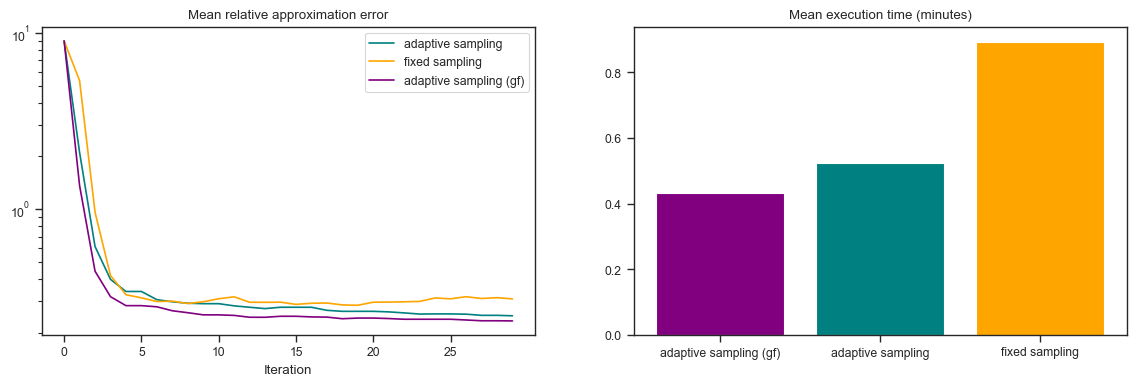

In [147]:
fig, axs = plt.subplots(1, 2, figsize=(14,4))

axs[0].plot(np.abs(np.mean(noise_archive_steps, axis=0)-error_sigma)/error_sigma, c="teal", label="adaptive sampling")
#_ = [axs[0].plot(np.abs(noise_archive_steps[i, :]-error_sigma)/error_sigma, c="grey", label=None, alpha=.2, linestyle="dashed") for i in range(n_runs)]
#axs[0].scatter([2, 4, 6, 8, 10], np.abs(np.mean(noise_archive_steps[:,[2, 4, 6, 8, 10]], axis=0)-error_sigma)/error_sigma, edgecolors="grey", facecolors="none", s=200, alpha=.5, label="sample step increase")
axs[0].plot(np.abs(np.mean(noise_archive_steps_comp, axis=0)-error_sigma)/error_sigma, c="orange", label="fixed sampling")
axs[0].plot(np.abs(np.mean(noise_archive_steps_gf, axis=0)-error_sigma)/error_sigma, c="purple", label="adaptive sampling (gf)")
axs[0].set_xlabel("Iteration")
axs[0].set_title("Mean relative approximation error")
axs[0].set_yscale("log")
axs[0].set_xticks([n_iter*i for i in range(len(sampler_steps))])
axs[0].legend(loc=1)
#axs[0].set_xscale("log")

axs[1].bar(["adaptive sampling (gf)", "adaptive sampling", "fixed sampling"],(np.mean(time_steps_gf)/60, np.mean(time_steps)/60, np.mean(time_comp)/60), color=["purple", "teal", "orange"])
axs[1].set_title("Mean execution time (minutes)")

In [269]:
#run_means = np.mean(parameter_estimates, axis=1) # mean across runs
#sample_means = np.mean(run_means, axis=2) # mean across samples
#errors = np.abs(parameter_estimates - true_parameter, axis=2)

flat_estimates = np.reshape(parameter_estimates, (max_N, D, number_of_samples*runs_for_averaging))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
#for i in range(number_of_samples * runs_for_averaging):
#    ax1.plot(number_of_observations, np.abs(flat_estimates[:, 0, i] - true_parameter[0]), color="grey", alpha=.01, label="sample error" if i == 0 else None)
#    ax2.plot(number_of_observations, np.abs(flat_estimates[:, 1, i] - true_parameter[1]), color="grey", alpha=.01, label="sample error" if i == 0 else None)

means_u1 = np.mean(np.abs(flat_estimates[:, 0, :] - true_parameter[0]), axis=1)
means_u2 = np.mean(np.abs(flat_estimates[:, 1, :] - true_parameter[1]), axis=1)

standard_deviations_u1 = np.std(np.abs(flat_estimates[:, 0, :] - true_parameter[0]), axis=1)
standard_deviations_u2 = np.std(np.abs(flat_estimates[:, 1, :] - true_parameter[1]), axis=1)

ax1.plot(number_of_observations, means_u1, color="teal", linewidth=2., zorder=3, label="average error")
ax2.plot(number_of_observations, means_u2, color="teal", linewidth=2., zorder=3, label="average error")

ax1.set_ylabel(r"")
ax2.set_ylabel(r"")

ax1.set_xlabel(r"Number of observations")
ax2.set_xlabel(r"Number of observations")

ax1.set_xticks(number_of_observations)
ax2.set_xticks(number_of_observations)

ax1.legend()
ax2.legend()

#fig.suptitle(r"Convergence to true parameters $u = (u_1, u_2)$")
ax1.set_title(r"Distance to true $u_1$")
ax2.set_title(r"Distance to true $u_2$")

#ax1.fill_between(number_of_observations, means_u1 - standard_deviations_u1, means_u1 + standard_deviations_u1, color="orange", alpha=0.2, label='± standard deviation')
#ax2.fill_between(number_of_observations, means_u2 - standard_deviations_u2, means_u2 + standard_deviations_u2, color="orange", alpha=0.2, label='± standard deviation')

NameError: name 'parameter_estimates' is not defined

In [136]:
n_obs = 11
runs_for_averaging = 5
G = lambda u: [u[0]*x**2 + u[1] for x in np.linspace(-10, 10, n_obs)]  # R^2 -> R^10
G_prime = lambda u: np.array([[x**2, 1] for x in np.linspace(-10, 10, n_obs)])

print(f"Performing LEM with {n_obs} observations...")
error_covariance = error_sigma * np.eye(n_obs)
error_mean = np.zeros(n_obs)

measurement_error = np.random.multivariate_normal(error_mean, error_covariance)
observations = [G(true_parameter) + measurement_error]

sample_sizes = [2**i for i in range(1, 8)]

noise_estimates_inc_sample_size = np.zeros((len(sample_sizes), runs_for_averaging))

for i, number_of_samples in enumerate(sample_sizes):
    print(f"\nPerforming LEM with {number_of_samples} samples...")
    estimated_parameter = []
    
    initial_noise_estimate = 5.
    for j in range(runs_for_averaging):
        print(f"Performing run {j+1} of {runs_for_averaging}...")
        lem = LEM(observations=observations,
                samples_per_observation=number_of_samples,
                forward_map=G,
                forward_gradient=G_prime,
                prior_mean=prior_mean,
                prior_covariance=prior_variance,
                number_of_iterations=30,
                initial_noise_estimate=initial_noise_estimate,
                dimensions=(D, n_obs),
                sampler_steps=300,
                gradient_free=False,
                verbose=False)
        
        lem.noise_estimate = initial_noise_estimate
        lem.max_step_size = 0.01

        #lem.single_problem = True
        lem.number_of_observations = 1
    
        lem.generate_initial_ensembles()
        #initial_ensembles = lem.ensembles.copy()
        ensembles, noise_estimate = lem.EM(verbose=False)
        noise_estimates_inc_sample_size[i, j] = noise_estimate
        print(f"Current estimate: {noise_estimate}.")
        #parameter_estimates[i, :, :, j] = ensembles
    print(f"Noise difference: {np.abs(lem.noise_estimate - error_sigma)}")

Performing LEM with 11 observations...

Performing LEM with 2 samples...
Performing run 1 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 7952.95it/s]


Current estimate: 5.0.
Performing run 2 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 7757.17it/s]


Current estimate: 5.0.
Performing run 3 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 8466.96it/s]


Current estimate: 2.2880043795703546.
Performing run 4 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 8832.41it/s]


Current estimate: 0.8856986183916491.
Performing run 5 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 8378.27it/s]


Current estimate: 5.0.
Noise difference: 4.0

Performing LEM with 4 samples...
Performing run 1 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 5737.68it/s]


Current estimate: 0.8670545168717335.
Performing run 2 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 5850.45it/s]


Current estimate: 0.8844946553970149.
Performing run 3 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 5488.18it/s]


Current estimate: 0.9572002076405937.
Performing run 4 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 6027.11it/s]


Current estimate: 0.9674404610863487.
Performing run 5 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 6017.22it/s]


Current estimate: 0.8353765107717295.
Noise difference: 0.16462348922827053

Performing LEM with 8 samples...
Performing run 1 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 3537.95it/s]


Current estimate: 0.8531724123650861.
Performing run 2 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 3604.60it/s]


Current estimate: 0.9148593289318551.
Performing run 3 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 3527.46it/s]


Current estimate: 0.9012826872006446.
Performing run 4 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 3638.48it/s]


Current estimate: 0.9145984814559014.
Performing run 5 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 3623.77it/s]


Current estimate: 0.8871596095166911.
Noise difference: 0.11284039048330885

Performing LEM with 16 samples...
Performing run 1 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 1899.30it/s]


Current estimate: 0.8820990244435567.
Performing run 2 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 1993.44it/s]


Current estimate: 0.8943388691432831.
Performing run 3 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 2004.83it/s]


Current estimate: 0.9484725058662136.
Performing run 4 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 1982.73it/s]


Current estimate: 0.8786778444286878.
Performing run 5 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 1962.84it/s]


Current estimate: 0.9238582553361464.
Noise difference: 0.0761417446638536

Performing LEM with 32 samples...
Performing run 1 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 1047.38it/s]


Current estimate: 0.9231750606694459.
Performing run 2 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 1050.02it/s]


Current estimate: 0.9015475980682777.
Performing run 3 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 1053.65it/s]


Current estimate: 0.9013122218316262.
Performing run 4 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 1067.11it/s]


Current estimate: 0.8899399323869628.
Performing run 5 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 1053.45it/s]


Current estimate: 0.8969231832632026.
Noise difference: 0.10307681673679736

Performing LEM with 64 samples...
Performing run 1 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 531.29it/s]


Current estimate: 0.9033712057132379.
Performing run 2 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 527.77it/s]


Current estimate: 0.9196124382927985.
Performing run 3 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 544.82it/s]


Current estimate: 0.9134916320706932.
Performing run 4 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 527.07it/s]


Current estimate: 0.939016170674821.
Performing run 5 of 5...


ALDI: 100%|██████████| 300/300 [00:00<00:00, 530.36it/s]


Current estimate: 0.913354211590915.
Noise difference: 0.08664578840908499

Performing LEM with 128 samples...
Performing run 1 of 5...


ALDI: 100%|██████████| 300/300 [00:01<00:00, 260.36it/s]


Current estimate: 0.9316547820469665.
Performing run 2 of 5...


ALDI: 100%|██████████| 300/300 [00:01<00:00, 256.91it/s]


Current estimate: 0.9131922926012741.
Performing run 3 of 5...


ALDI: 100%|██████████| 300/300 [00:01<00:00, 259.36it/s]


Current estimate: 0.9223817585544839.
Performing run 4 of 5...


ALDI: 100%|██████████| 300/300 [00:01<00:00, 259.41it/s]


Current estimate: 0.92167914581431.
Performing run 5 of 5...


ALDI: 100%|██████████| 300/300 [00:01<00:00, 258.07it/s]

Current estimate: 0.9113235246679519.
Noise difference: 0.08867647533204814


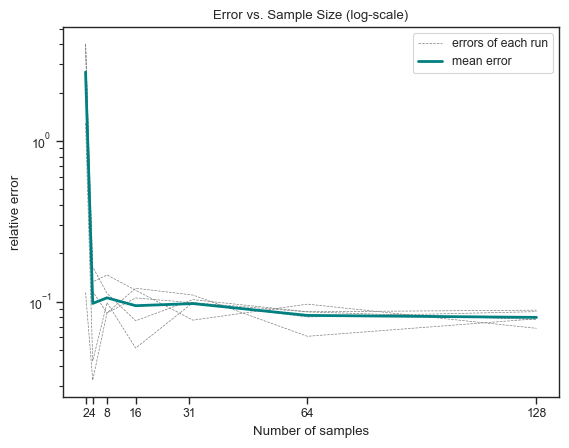

In [144]:
errors = np.abs(noise_estimates_inc_sample_size - error_sigma)
avg_errors = np.mean(errors, axis=1)
error_std_dev = np.std(errors, axis=1)
rlt_errors = avg_errors / error_sigma

error_plots = [plt.plot(sample_sizes, errors[:, i]/error_sigma, color="grey", linestyle="dashed", linewidth=0.5, label="errors of each run" if i==0 else None) for i in range(runs_for_averaging)]
plt.plot(sample_sizes, rlt_errors, color="teal", linewidth=2., zorder=3, label="mean error")
#plt.fill_between(sample_sizes, avg_errors - error_std_dev, avg_errors + error_std_dev, color="orange", alpha=0.2, label='± standard deviation')
plt.xlabel(r"Number of samples")
plt.xticks([2, 4, 8, 16, 31, 64, 128])
#plt.xscale("log")
plt.xticks([2**i for i in range(1, 8)])

plt.yscale("log")
#plt.ylim(0, 2)
#plt.yticks([0.1, 1])
plt.xticks([2, 4, 8, 16, 31, 64, 128])
plt.ylabel(r"relative error")
plt.title("Error vs. Sample Size (log-scale)")
plt.legend()